In [21]:
#!http://benalexkeen.com/principle-component-analysis-in-python/

In [3]:
import pandas as pd
from sklearn.decomposition import PCA

pokemon = pd.read_csv('Pokemon.csv')

In [4]:
print(pokemon.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation Legendary  
0       65       65     45           1     False  
1       80       80     60           1     False  
2      100      100     80           1     False  
3      122      120     80           1     False  
4       60       50     65           1     False  


In [5]:
df = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [7]:
T = pca.transform(df)

In [8]:
# Started with 6 dimensions
df.shape

(800, 6)

In [9]:
# Left with 2 principle components
T.shape

(800, 2)

In [10]:
df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [11]:
T

array([[ -45.86072754,   -5.38443151],
       [ -11.15293667,   -5.80561951],
       [  36.94600862,   -5.23612965],
       ..., 
       [  75.99988475,  -27.27078641],
       [ 114.0967126 ,  -36.87056714],
       [  72.88355049,   15.15261625]])

In [12]:
pca.explained_variance_ratio_

array([ 0.46096131,  0.18752145])

In [13]:
components = pd.DataFrame(pca.components_, columns = df.columns, index=[1, 2])
components

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,0.300808,0.492892,0.380635,0.508981,0.394370,0.327263
2,0.042210,0.076545,0.695216,-0.383311,0.173894,-0.576079


In [16]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df.columns.values)

Features by importance:
 [(143.6241995215176, 'Defense'), (119.74350606922006, 'Speed'), (105.83113958361311, 'Sp. Atk'), (76.02281561178802, 'Attack'), (68.1790434253425, 'Sp. Def'), (46.24128335926668, 'HP')]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

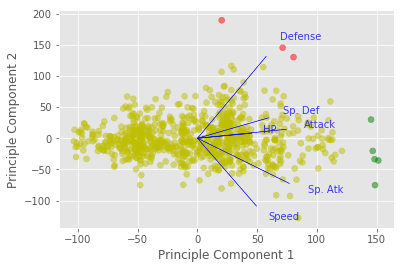

In [18]:
ax = draw_vectors(T, pca.components_, df.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 125, 'color'] = 'g'
T_df.loc[T_df['component2'] > 125, 'color'] = 'r'

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
plt.show()

In [19]:
# High Attack, High Sp. Atk, all of these pokemon are legendary
print(pokemon.loc[T_df[T_df['color'] == 'g'].index])

       #                   Name   Type 1    Type 2  Total   HP  Attack  \
163  150    MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190   
164  150    MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150   
422  382    KyogrePrimal Kyogre    Water       NaN    770  100     150   
424  383  GroudonPrimal Groudon   Ground      Fire    770  100     180   
426  384  RayquazaMega Rayquaza   Dragon    Flying    780  105     180   

     Defense  Sp. Atk  Sp. Def  Speed  Generation Legendary  
163      100      154      100    130           1      True  
164       70      194      120    140           1      True  
422       90      180      160     90           3      True  
424      160      150       90     90           3      True  
426      100      180      100    115           3      True  


In [20]:
# High Defense, Low Speed
print(pokemon.loc[T_df[T_df['color'] == 'r'].index])

       #                 Name Type 1  Type 2  Total  HP  Attack  Defense  \
224  208  SteelixMega Steelix  Steel  Ground    610  75     125      230   
230  213              Shuckle    Bug    Rock    505  20      10      230   
333  306    AggronMega Aggron  Steel     NaN    630  70     140      230   

     Sp. Atk  Sp. Def  Speed  Generation Legendary  
224       55       95     30           2     False  
230       10      230      5           2     False  
333       60       80     50           3     False  
